In [30]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
import scipy
from scipy import optimize

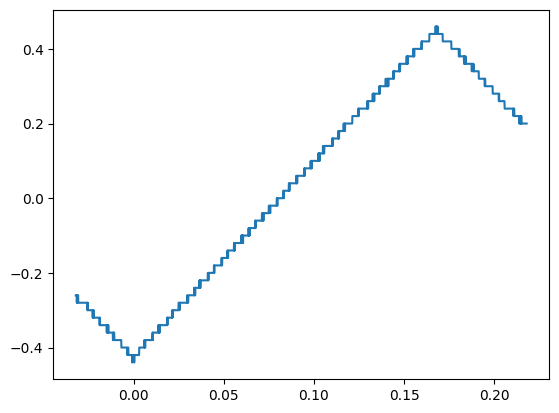

In [31]:
data1 = pandas.read_csv('Data1.csv')
time = np.array(data1["Time"])
ch1 = np.array(data1["Ch1"])
ch2 = np.array(data1["Ch2"])
ch3 = np.array(data1["Ch3"])

plt.plot(time, ch1)

In [32]:
def FindMichelsonCalibration(data, ch1, start, end):
    fringeCount = 0
    epsilon = .001*(max(ch2)- min(ch2))
    for i in data[start:end]:
        if(i < data[start]+epsilon and i > data[start]-epsilon):
            fringeCount += 1
    return (max(ch1)- min(ch1))/(fringeCount/2)

mc = FindMichelsonCalibration(ch2, ch1, np.where(ch1 == min(ch1))[0][0], np.where(ch1 == max(ch1))[0][0])

c = scipy.constants.c
f = c/780e-9
L1 = 233e-3
L2 = 46e-3
const = f**2/c/2/(L1-L2)*mc
V1 = ch1[np.where(ch3 == max(ch3))[0][0]]
V2 = ch1[np.where((ch3 <= -.11) & (ch3 >= -.12))[0][0]]

print(const*(V2- V1))

-1.5810337520699505e+18


[-6.90254814e-03  5.14053637e+02  8.39083395e-01 -3.21105174e-01]


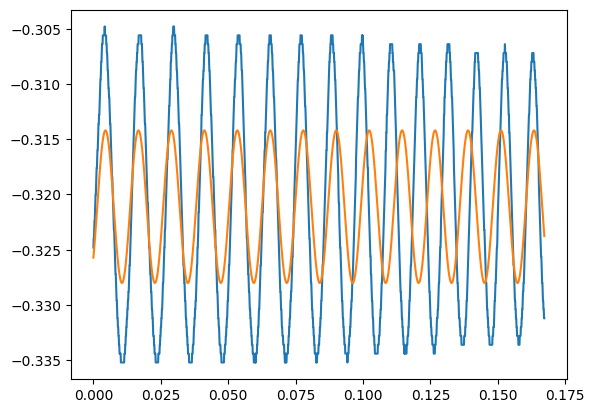

In [86]:
def fit(x, a, b, c, d):
    return a*np.cos(b*x+c)+ d

ch21 = ch2[np.where(time == 0)[0][0]:np.where(ch1 == max(ch1))[0][0]]
time1 = time[np.where(time == 0)[0][0]:np.where(ch1 == max(ch1))[0][0]]
mikeparams, mikecov = optimize.curve_fit(fit, time1, ch21, p0 = [-.013, 0.01, .00003, -.32])
print(mikeparams)

plt.plot(time1, ch21)
plt.plot(time1, fit(time1, *mikeparams))
    